In [1]:
import pandas as pd 
import numpy as np

In [2]:
df=pd.read_csv(r"C:\Users\SAKET NANDAN\Documents\current_hackathon\backorder_prediction\Back order prediction\data_no_null_in_target.csv")

### i m taking only those features to train our model which are selected by our feature selection steps,i used lasso coefficient based technique to select the features which gave me 6 best features 

In [3]:
data=df[['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month', 'sales_1_month', 'sales_9_month','went_on_backorder']]

In [4]:
data

,national_inv,lead_time,in_transit_qty,forecast_3_month,sales_1_month,sales_9_month,went_on_backorder
0,0.0,NaN,0.0,0.0,0.0,0.0,0
1,2.0,9.0,0.0,0.0,0.0,0.0,0
2,2.0,NaN,0.0,0.0,0.0,0.0,0
3,7.0,8.0,0.0,0.0,0.0,0.0,0
4,8.0,NaN,0.0,0.0,0.0,4.0,0
...,...,...,...,...,...,...,...
1687855,0.0,2.0,0.0,10.0,0.0,7.0,0
1687856,-1.0,NaN,0.0,5.0,1.0,8.0,0
1687857,-1.0,9.0,0.0,7.0,0.0,12.0,1
1687858,62.0,9.0,16.0,39.0,35.0,205.0,0


### Note:- i m not splitting train-test dataset here ,because i already tested the overfitting as well as accuracy for both train and test in my last phase of model designing to select the best model algo , so i m using entire data set to train our model more efficiently as well as i m using undersampling to handel the imbalance data problem , so if i will use entire data set then after applying under sampling i will get enough data to train our model in efficient manner 

In [5]:
# from feature-engine
from feature_engine import missing_data_imputers as mdi

In [6]:
median_imputer= mdi.MeanMedianImputer(imputation_method='median', variables = ['lead_time'])

In [7]:
data_new=median_imputer.fit_transform(data)

In [8]:
predictors=['national_inv','lead_time','in_transit_qty','forecast_3_month','sales_1_month','sales_9_month']
target=['went_on_backorder']

In [9]:
data_new[predictors]

,national_inv,lead_time,in_transit_qty,forecast_3_month,sales_1_month,sales_9_month
0,0.0,8.0,0.0,0.0,0.0,0.0
1,2.0,9.0,0.0,0.0,0.0,0.0
2,2.0,8.0,0.0,0.0,0.0,0.0
3,7.0,8.0,0.0,0.0,0.0,0.0
4,8.0,8.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...
1687855,0.0,2.0,0.0,10.0,0.0,7.0
1687856,-1.0,8.0,0.0,5.0,1.0,8.0
1687857,-1.0,9.0,0.0,7.0,0.0,12.0
1687858,62.0,9.0,16.0,39.0,35.0,205.0


In [10]:
from imblearn.under_sampling import NearMiss

In [11]:
# Implementing Undersampling for Handling Imbalanced 
nm = NearMiss()#NearMiss do not take random_state arguement 
X,y = nm.fit_sample(data_new[predictors],data_new[target])

### Note:- since , i have not splited my data into train-test dataset so my independent and dependent data are in pandas dataframe so in order to implement in XGBoostingClassifier algo in pickled , model will not take dataframe data as input  to predict , so i need to convert X(input data ) into numpy array , i m not converting y into numpy array 

In [12]:
X1=X.to_numpy()
#y1=y.to_numpy()

In [13]:
#y.shape
#X.shape

In [14]:
import seaborn as sns
import xgboost as xgb
# Classification metrices
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, precision_score,recall_score,f1_score

In [15]:
xgb.__version__

'1.1.0'

#### Note:- here i m using XGBoosting version is 1.1.0 , which have some diffrent strategy to take input in loaded pickled model , i will discuss in pickled section below 

train set
 xtra Gradient boosting Classifier model accuracy score for train set : 0.9253
Confusion matrix

 [[10822   471]
 [ 1217 10076]]

True Positives(TP) =  10822

True Negatives(TN) =  10076

False Positives(FP){type 1 error} =  471

False Negatives(FN){type 2 error} =  1217



classification report
              precision    recall  f1-score   support

           0       0.90      0.96      0.93     11293
           1       0.96      0.89      0.92     11293

    accuracy                           0.93     22586
   macro avg       0.93      0.93      0.93     22586
weighted avg       0.93      0.93      0.93     22586




Classification accuracy : 0.9253



Classification error : 0.0747



Precision : 0.9583



Recall or Sensitivity : 0.8989



True Positive Rate : 0.8989



False Positive Rate : 0.0447



Specificity : 0.9553





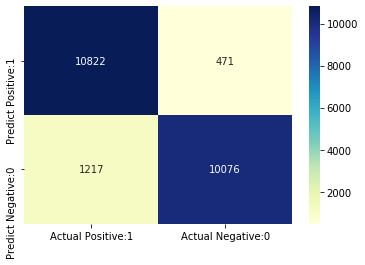

In [18]:
xgb_clf =xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=3, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=50, reg_alpha=1.2,
              reg_lambda=1.6, scale_pos_weight=1.0, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=0)

xgb_clf.fit(X1, y)
#predict train set 
print('train set')
y_pred = xgb_clf.predict(X1)
# print the accuracy
print(' xtra Gradient boosting Classifier model accuracy score for train set : {0:0.4f}'. format(accuracy_score(y, y_pred)))


#-------------------------------------------------confusion matrix-----------------------------------------------------------

# print confusion-matrix

cm = confusion_matrix(y, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP){type 1 error} = ', cm[0,1])

print('\nFalse Negatives(FN){type 2 error} = ', cm[1,0])
print('\n\n')

#-------------------------------visualization of confusion matrix -----------------------------------------------------------

# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

#----------------------------------classification report ----------------------------------------------------------------------
print('classification report')
print(classification_report(y, y_pred))
print('\n\n')
#-----------------------------------classification accuracy -------------------------------------------------------------------
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))
print('\n\n')

#----------------------------------------classification error------------------------------------------------------------------

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))
print('\n\n')

#----------------------------------------precision-----------------------------------------------------------------------------

precision = TP / float(TP + FP)

print('Precision : {0:0.4f}'.format(precision))
print('\n\n')


#--------------------------------------------Recall---------------------------------------------------------------------------
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))
print('\n\n')
#--------------------------------------Truepositive rate------------------------------------------------------------------------

true_positive_rate = TP / float(TP + FN)

print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))
print('\n\n')

#--------------------------------------false positive rate---------------------------------------------------------------------
false_positive_rate = FP / float(FP + TN)

print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))
print('\n\n')
#------------------------------------------ Specificity (True Negative Rate) --------------------------------------------------
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))
print('\n\n')

#--------------------------------------------------------------------------------------------------------------------------------



In [19]:
##pip install pickle-mixin
import pickle

In [20]:
#saving the model to the local file system
filename = 'finalized_model.pickle'
pickle.dump(xgb_clf, open(filename, 'wb'))

In [21]:
type(X1)

numpy.ndarray

###### generaly in order to predict value for single instance we need to pass like :- prediction=loaded_model.predict([[62.0,9.0,16.0,39.0,35.0,205.0]])) but its not working in XGBoosting version 1.1.0 , we have to convert the instance into numpy array 


In [22]:
# prediction using the saved model.
loaded_model = pickle.load(open(filename, 'rb'))
prediction=loaded_model.predict(np.array([[62.0,9.0,16.0,39.0,35.0,205.0]]))

print(prediction)


[1]


In [24]:
from sklearn.externals import joblib
joblib.dump(xgb_clf, 'model.pkl')

['model.pkl']

In [25]:
clf = joblib.load('model.pkl')
prediction=clf.predict(np.array([[62.0,9.0,16.0,39.0,35.0,205.0]]))
print(prediction)

[1]


In [26]:
def change (prediction):
    if prediction==1:
        return 'yes'
    else:
        return 'No'

In [31]:
print('when,product,s current inventory=62,lead time=9,in transit qantity=16,forcast value for next 3 month=39,prior 1 month sales=35,prior 9 month sales=205')
print('will product go for backorder ? {}'.format(change(prediction)))

when,product,s current inventory=62,lead time=9,in transit qantity=16,forcast value for next 3 month=39,prior 1 month sales=35,prior 9 month sales=205
will product go for backorder ? yes
